In [37]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

# Ler dados

In [2]:
df = pd.read_csv("compositions_composition_dayse_excel.csv", delimiter=";")
df.columns

Index(['id', 'title', 'introduction_text_raw', 'middle_text_raw',
       'conclusion_text_raw', 'flag_finished', 'revision_deadline', 'created',
       'modified', 'instruction_id_id', 'user_id', 'flag_help',
       'composition_raw', 'composition_tags', 'test_id', 'flag_revision',
       'status', 'source', 'finished', 'flag_use_in_statistics',
       'flag_manual_review', 'update_statistics', 'last_processed_hash',
       'flag_reopened', 'genre_id', 'first_parent_id', 'parent_id',
       'transcription', 'client_created'],
      dtype='object')

# Funções necessárias

A função get_word_classe tem o objetivo de analisar uma palavra e retornar qual sua classe gramatical
A função get_lexicon recebe um texto e retorna a quantidade de vezes que cada palavra apareceu no texto excluindo as palavras pertencentes a uma lista de classes

In [11]:
def get_word_classe(word):
    if len(word) > 3:
        return 'substantivo'
    else:
        return 'artigo'

def get_lexicon(text, exclude_categories=[]):
    tokens_result = nltk.word_tokenize(text)
    tokens = {}
    exclusion = [",", ".", ";", ":"]
    for token in tokens_result:
        token_lower = token.lower()
        cat = get_word_classe(token_lower)
        if token not in exclusion and cat not in exclude_categories:
            if not token_lower in tokens.keys():
                tokens[token_lower] = 1
            else:
                tokens[token_lower] += 1
    return tokens

# Listar quantidade de redações por usuário

In [67]:
df.groupby("user_id").size()

user_id
1643      5
2246     12
2278     12
2584     14
2593     16
2594     16
2595     11
2596     15
2597     12
2598     15
2599     12
2600     15
2601     16
2602     15
2603     14
2604     15
2605     15
2606     12
2607     11
2608     13
2609     16
2610     14
2611     14
2612     15
2613     14
2614     15
2616     11
2617     16
2618     12
2619     11
         ..
23745     1
23746     1
23752     1
23754     1
23756     1
23758     1
23764     1
23909     1
23926     1
23932     1
23933     1
23934     1
23943     1
23948     4
23949     1
23951     1
23954     1
23955     1
23956     1
23958     1
23960     1
23966     1
23967     3
23972     1
23977     1
23980     1
23988     1
23989     1
23990     1
23996     1
Length: 280, dtype: int64

# Plotar a evolução do índice de repertório para um usuário específico

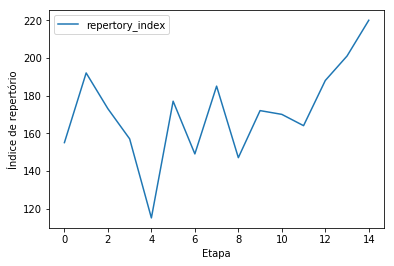

In [66]:
user_id = 2596

def repertory_index(row):
    text = "\n".join([str(row['introduction_text_raw']), str(row['middle_text_raw']), str(row['conclusion_text_raw'])])
    lexicon = get_lexicon(text, exclude_categories=['artigo'])
    return len(lexicon.keys())
    
df2 = df[df['user_id']==user_id].sort_values(by='created', ascending=True)
df2['repertory_index'] = df2.apply(repertory_index, axis=1)
df2 = df2[['created', 'repertory_index']]
df2.reset_index(inplace=True)

fig, ax = plt.subplots()
ax.set_xlabel("Etapa")
ax.set_ylabel("Índice de repertório")
df2.plot(y='repertory_index', use_index=True, ax=ax)